In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
# model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype('float32')/255.
test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype('float32')/255.
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))
import matplotlib.pyplot as plt
plt.plot(range(10), history.history['val_acc'])
plt.show()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0697 - acc: 0.9792 - val_loss: 0.0600 - val_acc: 0.9814
Epoch 2/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0638 - acc: 0.9812 - val_loss: 0.0588 - val_acc: 0.9819
Epoch 3/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0617 - acc: 0.9818 - val_loss: 0.0554 - val_acc: 0.9821
Epoch 4/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0591 - acc: 0.9825 - val_loss: 0.0554 - val_acc: 0.9819
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0574 - acc: 0.9831 - val_loss: 0.0533 - val_acc: 0.9838
Epoch 6/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0551 - acc: 0.9834 - val_loss: 0.0512 - val_acc: 0.9839
Epoch 7/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0544 - acc: 0.9833 - val_loss: 0.0519 - val_acc: 0.9839
Epoch 8/10
469/469 [==============================] - 12s 25ms

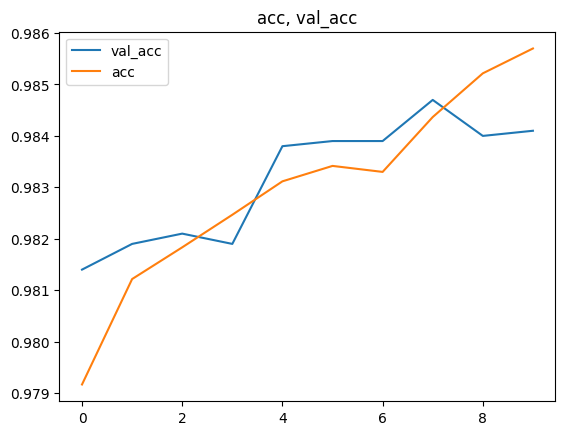

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(10), history.history['val_acc'], label='val_acc')
plt.plot(range(10), history.history['acc'], label='acc')
plt.title('acc, val_acc')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype('float32')/255.
test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype('float32')/255.
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
history2 = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))
import matplotlib.pyplot as plt
plt.plot(range(10), history2.history['val_acc'])
plt.show()


In [9]:
import pandas as pd
data = pd.read_csv('c:\\pytest\\ratings.txt', encoding='cp949', sep='\t')


In [19]:
data.dropna(inplace=True)
# data.drop('id',axis=1,inplace=True)
data.reset_index(drop=True,inplace=True)
data

,document,label
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...
199987,포켓 몬스터 짜가 ㅡㅡ;;,0
199988,쓰.레.기,0
199989,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199990,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [20]:
import rhinoMorph
rn=rhinoMorph.startRhino()
def morph(text):
    morphed=rhinoMorph.onlyMorph_list(rn,text,pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'])
    return ' '.join(morphed)


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [22]:
data['document']=data['document'].apply(morph)
data

,document,label
0,어리 때 보 지금 다시 보 재미있 ㅋㅋ,1
1,디자인 배우 학생 외국 디자이너 그 일구 전통 통하 발전 문화 산업 부럽 사실 우리...,1
2,폴리스스토리 시리즈 뉴 없 최고,1
3,와 연기 진짜 쩔 지루 생각하 몰입 그래 이런 진짜 영화,1
4,안개 자욱 하 밤하늘 뜨 초승달 같 영화,1
...,...,...
199987,포켓 몬스터 짜가 ㅡㅡ,0
199988,쓰 레 기,0
199989,완전 사이코 영화 마지막 더욱더 이 영화 의 질 떨,0
199990,왜 나 재미없 ㅠㅠ 라따뚜이 보 스머프 보 그렇 ㅋㅋ,0


In [99]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [28]:
text_len=[len(sen) for sen in data['document']]
np.percentile(text_len, [50,70,75,80,90,95,100])

array([ 19.,  28.,  31.,  34.,  54.,  76., 209.])

In [43]:
max_len = 80
max_words = 10000
token = Tokenizer(num_words=max_words)
token.fit_on_texts(data['document'])

In [69]:
seq = token.texts_to_sequences(data['document'])


In [76]:
pad = pad_sequences(seq, maxlen=max_len)

In [79]:
pad, data.label

(array([[   0,    0,    0, ...,    3,    6,    5],
        [   0,    0,    0, ...,  636,   13,  439],
        [   0,    0,    0, ..., 2591,    4,   21],
        ...,
        [   0,    0,    0, ...,  305,  479, 1170],
        [   0,    0,    0, ...,    3,  111,    5],
        [   0,    0,    0, ..., 2003, 6896,  636]]),
 0         1
 1         1
 2         1
 3         1
 4         1
          ..
 199987    0
 199988    0
 199989    0
 199990    0
 199991    0
 Name: label, Length: 199992, dtype: int64)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(pad, data.label)

In [102]:
X_test

array([[   0,    0,    0, ..., 1240,  260,  399],
       [   0,    0,    0, ...,  182,  797, 6236],
       [   0,    0,    0, ...,   68,   10,   17],
       ...,
       [   0,    0,    0, ...,   44, 1263,    1],
       [   0,    0,    0, ...,  207,    8,    6],
       [   0,    0,    0, ...,  109,  238,  329]])

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv2D, Conv1D, MaxPool2D, Dropout, LSTM, MaxPooling1D, MaxPooling2D, Flatten, Dropout
embedding_dim = 200


In [113]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile('rmsprop','binary_crossentropy','acc')

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 80, 200)           2000000   
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 78, 32)            19232     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 39, 32)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 39, 32)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)             

In [114]:
history_3 = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50
1172/1172 [==============================] - 48s 41ms/step - loss: 0.3919 - acc: 0.8209 - val_loss: 0.3539 - val_acc: 0.8434
Epoch 2/50
1172/1172 [==============================] - 46s 40ms/step - loss: 0.3391 - acc: 0.8516 - val_loss: 0.3473 - val_acc: 0.8472
Epoch 3/50
1172/1172 [==============================] - 46s 40ms/step - loss: 0.3195 - acc: 0.8613 - val_loss: 0.3421 - val_acc: 0.8496
Epoch 4/50
1172/1172 [==============================] - 47s 40ms/step - loss: 0.3017 - acc: 0.8712 - val_loss: 0.3482 - val_acc: 0.8469
Epoch 5/50
1172/1172 [==============================] - 52s 45ms/step - loss: 0.2873 - acc: 0.8785 - val_loss: 0.3532 - val_acc: 0.8493
Epoch 6/50
1172/1172 [==============================] - 51s 43ms/step - loss: 0.2727 - acc: 0.8859 - val_loss: 0.3454 - val_acc: 0.8502
Epoch 7/50
1172/1172 [==============================] - 50s 43ms/step - loss: 0.2596 - acc: 0.8921 - val_loss: 0.3601 - val_acc: 0.8448
Epoch 8/50
1172/1172 [==========================

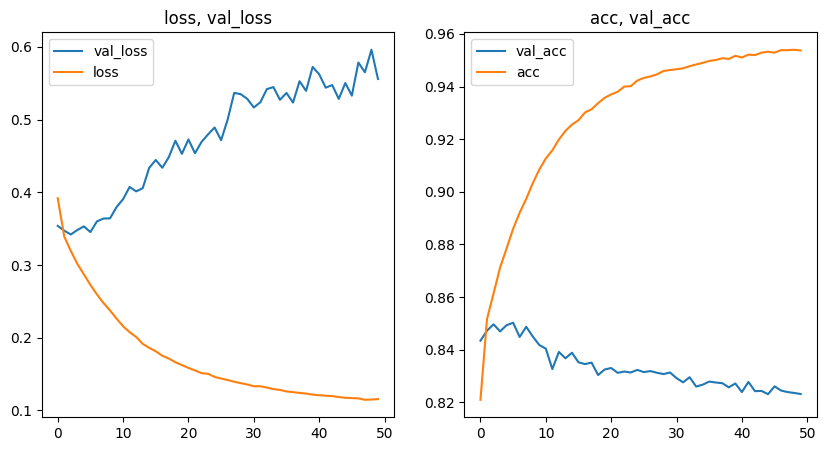

1563/1563 [==============================] - 5s 3ms/step - loss: 0.5559 - acc: 0.8231


[0.5559030175209045, 0.8231329321861267]

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range(len(history_3.history['val_loss'])), history_3.history['val_loss'], label='val_loss')
plt.plot(range(len(history_3.history['loss'])), history_3.history['loss'], label='loss')
plt.title('loss, val_loss')
plt.legend()
plt.subplot(122)
plt.plot(range(len(history_3.history['val_acc'])), history_3.history['val_acc'], label='val_acc')
plt.plot(range(len(history_3.history['acc'])), history_3.history['acc'], label='acc')
plt.title('acc, val_acc')
plt.legend()
plt.show()
model.evaluate(X_test, y_test)

In [106]:
history_1 = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
1172/1172 [==============================] - 49s 42ms/step - loss: 0.3932 - acc: 0.8206 - val_loss: 0.3524 - val_acc: 0.8439
Epoch 2/10
1172/1172 [==============================] - 50s 43ms/step - loss: 0.3391 - acc: 0.8517 - val_loss: 0.3445 - val_acc: 0.8473
Epoch 3/10
1172/1172 [==============================] - 50s 43ms/step - loss: 0.3190 - acc: 0.8624 - val_loss: 0.3417 - val_acc: 0.8496
Epoch 4/10
1172/1172 [==============================] - 51s 44ms/step - loss: 0.3019 - acc: 0.8707 - val_loss: 0.3423 - val_acc: 0.8504
Epoch 5/10
1172/1172 [==============================] - 56s 48ms/step - loss: 0.2879 - acc: 0.8781 - val_loss: 0.3422 - val_acc: 0.8490
Epoch 6/10
1172/1172 [==============================] - 52s 44ms/step - loss: 0.2739 - acc: 0.8847 - val_loss: 0.3594 - val_acc: 0.8450
Epoch 7/10
1172/1172 [==============================] - 49s 41ms/step - loss: 0.2604 - acc: 0.8918 - val_loss: 0.3663 - val_acc: 0.8428
Epoch 8/10
1172/1172 [==========================

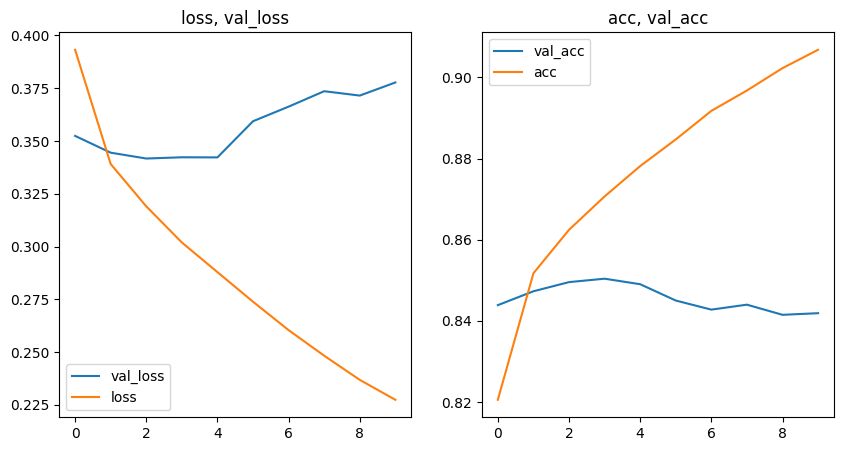

1563/1563 [==============================] - 5s 3ms/step - loss: 0.3777 - acc: 0.8419


[0.37774336338043213, 0.8418936729431152]

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range(10), history_1.history['val_loss'], label='val_loss')
plt.plot(range(10), history_1.history['loss'], label='loss')
plt.title('loss, val_loss')
plt.legend()
plt.subplot(122)
plt.plot(range(10), history_1.history['val_acc'], label='val_acc')
plt.plot(range(10), history_1.history['acc'], label='acc')
plt.title('acc, val_acc')
plt.legend()
plt.show()
model.evaluate(X_test, y_test)

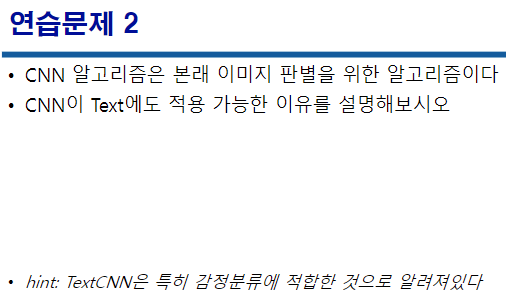

* convolution layer는 여러칸을 한번에 한 window로 받아들여 계산값을 산출한다.

* filter에 따라 다르긴 하지만, 이는 n-gram과 같은 방식으로 한번에 앞뒤로 여러 단어를 보는 효과와 같다.

* cnn이 일반적으로 이미지에 판별에 좋다는 것은 차원이 맞기 때문이지만, 사실 음성이든 이미지든 차원만 맞다면 컴퓨터는 어차피 같은 숫자로 이루어진 matrix를 계산하는 것이므로, 결과만 잘 나온다면 종류에 관계없이 어떤 레이어를 써도 무방하다고 생각한다.

* 감정분류에 잘 적용되는 이유는 여러 단어를 한꺼번에 살필 수 있는 CNN의 특성 탓에 한 단어의 뜻을 보는 것 뿐만 아니라 여러 단어로 이루어진 집합의 뜻을 잘 살펴 감정을 분류하기 때문에, 반어법이라든지 복잡한 감정을 잘 분류할 수 있는 것이라 생각한다.

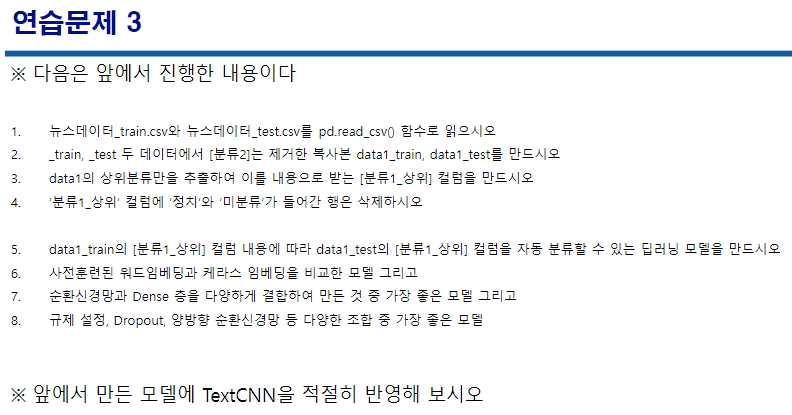

In [115]:
path = "C:\\pytest\\뉴스데이터\\"

In [ ]:
import pandas as pd

news_train = pd.read_csv(path+"뉴스데이터_train.csv")
news_test = pd.read_csv(path+"뉴스데이터_test.csv")

In [ ]:
# 분류2 제거
news_train